<a href="https://colab.research.google.com/github/qedir314/BTK-Akademi/blob/main/1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification

In [57]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
cancer = load_breast_cancer()

In [6]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
X = cancer.data    # Feature
y = cancer.target  # Target

In [12]:
knn = KNeighborsClassifier()    # Don't forget K

In [13]:
knn.fit(X, y)    # Training

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X)
accuracy_score(y, y_pred)

0.9472759226713533

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9590643274853801

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 59,   4],
       [  3, 105]])

In [66]:
scores = []
k_values = []
for k in range(1,21):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score = accuracy_score(y_pred, y_test)
  scores.append(score)
  k_values.append(k)
print(scores)

[0.9532163742690059, 0.9532163742690059, 0.9590643274853801, 0.9649122807017544, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9649122807017544, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9649122807017544, 0.9649122807017544, 0.9532163742690059, 0.9649122807017544, 0.9532163742690059, 0.9590643274853801, 0.9473684210526315, 0.9532163742690059]


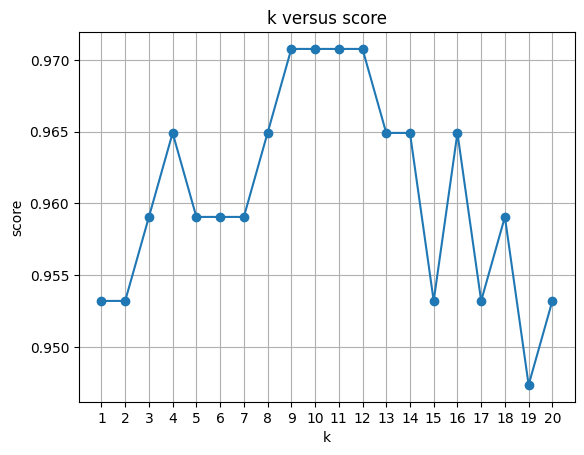

In [72]:
plt.figure()
plt.plot(k_values, scores, marker='o', linestyle='-')
plt.title("k versus score")
plt.xlabel("k")
plt.ylabel("score")
plt.xticks(k_values)   # only in k_values, not float
plt.grid(True)
plt.show()

## Regression

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

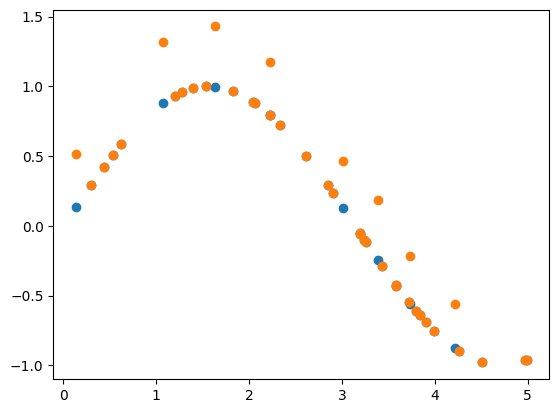

In [93]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)  # uniform distribution
y = np.sin(X).ravel()   # Target

plt.scatter(X, y)
# Add noise

y[::5] += 1 * (0.5 * np.random.rand(8))

plt.scatter(X, y)
plt.show()

In [100]:
T = np.linspace(0, 5, 500)[:, np.newaxis]

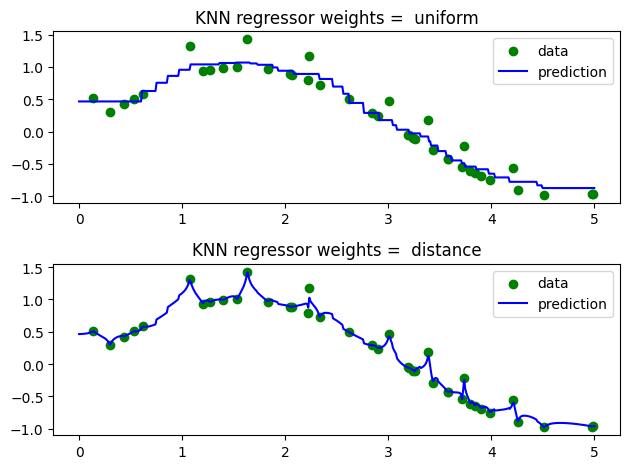

In [120]:
for i, weight in enumerate(["uniform", "distance"]):
  knn = KNeighborsRegressor(n_neighbors = 5, weights=weight)
  y_pred = knn.fit(X, y).predict(T)

  plt.subplot(2, 1, i+1)
  plt.scatter(X, y, color= "green", label="data")
  plt.plot(T, y_pred, color= "blue", label="prediction")
  plt.axis("tight")
  plt.legend()
  plt.title(f"KNN regressor weights =  {weight}")

plt.tight_layout()
plt.show()